## 苹果股票分析项目

### 导包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 读取数据
- AAPL.csv文件

In [2]:
apple = pd.read_csv('data/11_苹果股票分析项目/AAPL.csv')
apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.421597,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.399601,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.370272,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.379437,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.390436,18362400
...,...,...,...,...,...,...,...
9291,2017-10-17,159.779999,160.869995,159.229996,160.470001,160.470001,18997300
9292,2017-10-18,160.419998,160.710007,159.600006,159.759995,159.759995,16374200
9293,2017-10-19,156.750000,157.080002,155.020004,155.979996,155.979996,42584200
9294,2017-10-20,156.610001,157.750000,155.960007,156.250000,156.250000,23974100


In [3]:
apple.shape

(9296, 7)

In [5]:
# 随机查看10条数据
apple.sample(n=10)
# 取总样本的0.1%
apple.sample(frac=0.001)

,Date,Open,High,Low,Close,Adj Close,Volume
8462,2014-07-03,93.669998,94.099998,93.199997,94.029999,88.505142,22891800
5024,2000-10-30,1.366071,1.424107,1.339286,1.379464,1.241043,159797400
3793,1995-12-14,1.388393,1.406250,1.357143,1.366071,1.228994,83375600
8728,2015-07-24,125.320000,125.739998,123.900002,124.500000,119.241196,42162300
3906,1996-05-28,0.955357,0.973214,0.941964,0.941964,0.847444,25463200
1422,1986-07-31,0.544643,0.562500,0.544643,0.558036,0.458258,70560000
4679,1999-06-21,1.678571,1.687500,1.642857,1.660714,1.494072,33787600
7515,2010-09-28,41.681427,41.681427,39.285713,40.980000,36.867908,258760600
6548,2006-11-22,12.712857,12.964286,12.550000,12.901428,11.606848,167985300


####  检查数据类型

In [7]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9296 entries, 0 to 9295
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9296 non-null   object 
 1   Open       9296 non-null   float64
 2   High       9296 non-null   float64
 3   Low        9296 non-null   float64
 4   Close      9296 non-null   float64
 5   Adj Close  9296 non-null   float64
 6   Volume     9296 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.5+ KB


In [9]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9296.000000,9296.000000,9296.000000,9296.000000,9296.000000,9.296000e+03
mean,21.171909,21.374401,20.949917,21.167384,19.888297,8.923616e+07
std,37.544405,37.839621,37.222077,37.540368,36.112221,8.731405e+07
min,0.198661,0.198661,0.196429,0.196429,0.161307,3.472000e+05
25%,1.031250,1.053571,1.011161,1.031250,0.916267,3.507770e+07
50%,1.625000,1.651786,1.598214,1.624643,1.424670,6.131125e+07
75%,19.855715,20.088214,19.473214,19.833571,17.843392,1.115664e+08
max,164.800003,164.940002,163.630005,164.050003,164.050003,1.855410e+09


#### 将'Date'这列数据转换为时间数据类型
- pd.to_datetime： 转为时间数据类型

In [13]:
apple['Date'] = pd.to_datetime(apple['Date'] )
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

#### 将'Date'设置为行索引
- set_index() : 设置行索引

In [17]:
apple2 = apple.set_index(apple.Date)
apple2

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1980-12-12,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.421597,117258400
1980-12-15,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.399601,43971200
1980-12-16,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.370272,26432000
1980-12-17,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.379437,21610400
1980-12-18,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.390436,18362400
...,...,...,...,...,...,...,...
2017-10-17,2017-10-17,159.779999,160.869995,159.229996,160.470001,160.470001,18997300
2017-10-18,2017-10-18,160.419998,160.710007,159.600006,159.759995,159.759995,16374200
2017-10-19,2017-10-19,156.750000,157.080002,155.020004,155.979996,155.979996,42584200


#### 绘制图形：收盘价格
- 字段Adj Close：已调整收盘价格

<Axes: xlabel='Date'>

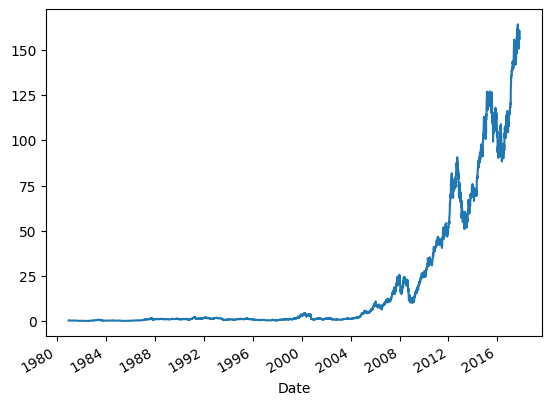

In [18]:
apple2['Adj Close'].plot()